In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
advertising_data=pd.read_csv('Documents/dataset/advertising-data/Advertising.csv', index_col=0)
advertising_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
advertising_data.shape

(200, 4)

In [4]:
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
advertising_data_corelation=advertising_data.corr()
advertising_data_corelation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


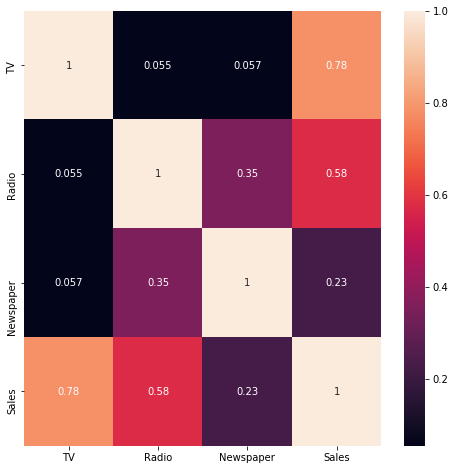

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(advertising_data_corelation, annot=True)

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [9]:
#X variable contains all columns except 'Sales' column


X = advertising_data.drop('Sales', axis=1)

Y = advertising_data['Sales']

In [17]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [19]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.30, random_state=0 )

In [20]:
x_train.shape, y_train.shape

((140, 3), (140,))

In [21]:
x_test.shape, y_test.shape

((60, 3), (60,))

In [22]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)

fit_model = stats_model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           8.76e-70
Time:                        12:31:34   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.994      0.0

In [23]:
#setting normalize= true will center our x data around 0 as a mean. 
#so it'll subtract the mean from all of our x-predictor values and divide by the L2 norm.
#fit will start training our liner regression model.



linear_reg = LinearRegression(normalize= True).fit(x_train, y_train)
linear_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [24]:
print("Training Score : ", linear_reg.score(x_train, y_train))

Training Score :  0.9065727532450597


In [25]:
#now that we have fully trained machine learning model, we can use it for prediction on the test data.

y_pred= linear_reg.predict(x_test)

In [26]:
#The R-squared on the test data is close to the train data and hence it is good model.


from sklearn.metrics import r2_score

print("Testing_score : ",r2_score(y_test, y_pred) )

Testing_score :  0.8649018906637793


In [27]:
#since the scikitlearn doesn't have formula for adjusted R-square, it is calculated manually.

def adjusted_r2(r_square, labels, features):
    adj_r_square = 1 - ((1-r_square) * (len(labels)-1))/  (len(labels)- features.shape[1])
    return adj_r_square

In [28]:
print(" Adjusted R2 SCORE : ", adjusted_r2(r2_score(y_test, y_pred), y_test, x_test))

 Adjusted R2 SCORE :  0.8601616061256663
